In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

from scipy.stats import norm, uniform, expon
from scipy.stats import bernoulli
from scipy.stats import randint
from scipy.stats import binom
from numpy import random


✍ Бывают случайные величины, которые могут принимать очень много значений — так много, что дискретная модель становится неудобной.

Представьте, что вы анализируете процессы всемирного потепления, и вам необходимо фиксировать точные значения температуры в разных точках планеты. Разумеется, у вас есть сверхточные инструменты, поэтому температура может принимать огромный спектр значений: не просто 23 или 24 градуса, а 23.14, 23.5 или даже 23.4582 градуса. В таком случае даже очень большая и подробная таблица не сможет описать все возможные значения, вероятность каждого конкретного значения размывается, и работать с моделью становится сложно.

Для таких ситуаций существует **непрерывная модель**. В ней распределение вероятностей задаётся не таблицей, а с помощью функции **плотности вероятности**.

Плотностью может быть любая неотрицательная функция, площадь которой под графиком равна 1 (так как сумма вероятностей всех исходов равна 1) и которая удовлетворяет некоторым условиям. Эти условия мы не будем обсуждать в данном юните, так как они выходят за рамки курса из-за сложной математической составляющей, однако если вам интересно разобраться в этом, рекомендуем ознакомиться со следующим материалом.

В дискретном случае мы без проблем вычисляли вероятность, но тут задача становится сложнее. Однако нам всё равно необходимо научиться это делать.

Возвращаясь к примеру с температурой: если мы ведём наблюдения за климатом, то нам интересно не только записывать текущие результаты, но и, например, предсказывать погоду на будущее — для этого необходимо вычислять вероятности.

Для того чтобы вычислить вероятность для непрерывной случайной величины, необходимо найти площадь под графиком плотности в заданном промежутке. Например, на графике ниже заштрихована вероятность того, что значение $X$ лежит в интервале от 1 до 3:

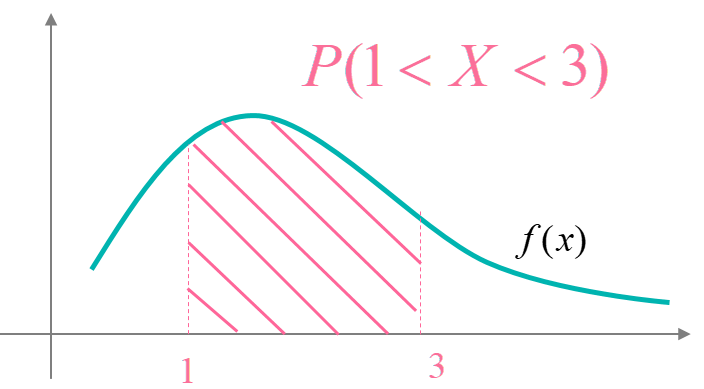

Такой способ нахождения вероятности должен быть интуитивно понятен. Если вся площадь равна единице, то вся площадь выражает собой сумму вероятностей для всех исходов. Когда мы выделяем только часть исходов, то берём площадь только для них и получаем ту долю от единицы, которую составляют эти исходы от всех возможных.

Как и в дискретном случае, мы рассмотрим основные непрерывные распределения:

+ равномерное;
+ нормальное;
+ экспоненциальное.

# **РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ**

В предыдущем юните мы рассмотрели дискретное равномерное распределение, однако существует ещё и **непрерывное равномерное распределение**.

Непрерывная случайная величина $X$ распределяется равномерно, если вероятность попадания $X$ в интервал пропорциональна длине этого интервала. То есть, к примеру, если мы рассматриваем все числа от 1 до 100 и ищем вероятность попадания в интервал от 1 до 10, то вероятность равна 0.1, а для интервала от 1 до 30 — 0.3.

Равномерная непрерывная случайная величина используется в различных экономических моделях. Например, при выпуске в продажу нового товара для управления необходимыми запасами на складе на первых этапах используют равномерное непрерывное распределение. Это делают следующим образом: прогнозируют спрос на товар на основании различных факторов (например, по времени года, населению и т. д.) и моделируют показатель спроса равномерным распределением на первые дни и недели продажи товара.

Кроме того, равномерную непрерывную случайную величину используют для генерации случайных чисел, если подходят любые вещественные значения. Генерация случайных чисел (по сути, генерация «шума»), в свою очередь, используется для того, чтобы получать из маленькой выборки бόльшую (это называется **аугментацией**): если вы умеете генерировать непрерывные распределения (в том числе равномерное), то можете искусственно увеличить объём ваших данных и повысить качество модели.

---

Случайная величина, которая распределена по непрерывному равномерному закону, может принимать в качестве значения любое вещественное число в заданном отрезке от $a$ до $b$ и имеет следующее математическое ожидание и среднеквадратичное отклонение:

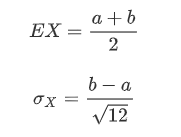

---

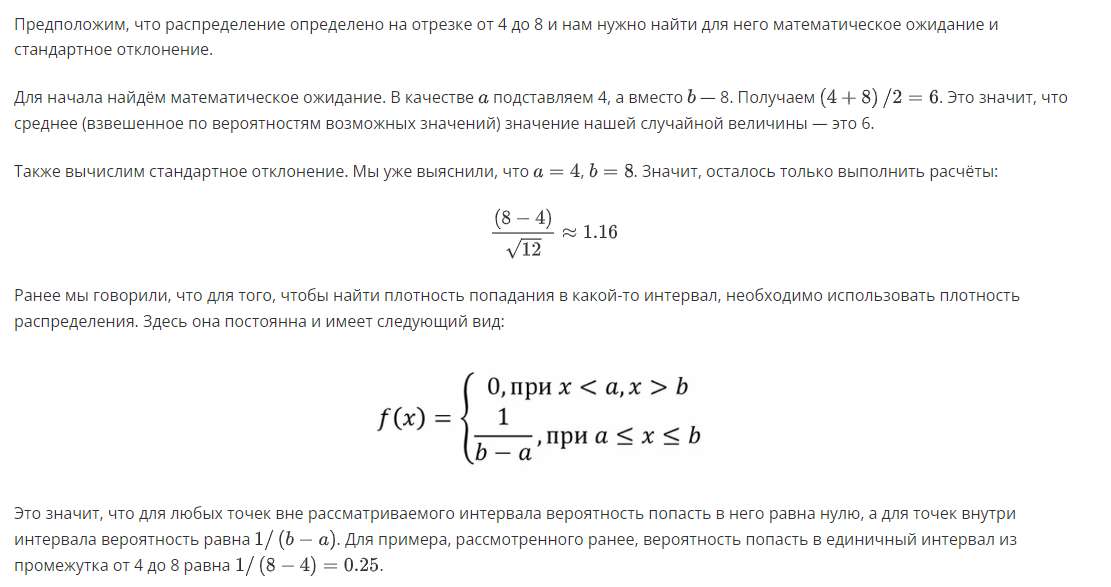

Мы можем с помощью Python смоделировать случайную величину c таким распределением и визуализировать плотность её распределения. К примеру, сформируем выборку объёмом 10000 для распределения с параметрами $a = 10$ и $b = 40$:

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


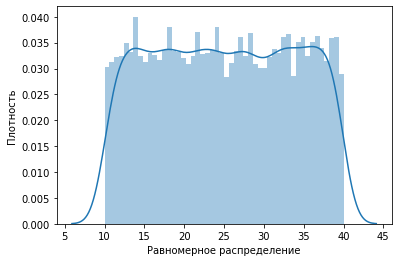

In [11]:
data = uniform.rvs(size=10000, loc = 10, scale=30)
ax = sns.distplot(data,
                  bins=50)
ax.set(xlabel='Равномерное распределение', ylabel='Плотность');

По графику плотности распределения видно, что в рамках интересующего нас интервала все значения сгенерированы примерно с одной частотой. Разумеется, есть некоторые колебания, но с реальными данными у вас всегда будет получаться именно такая картина, отличная от идеального теоретического предположения.

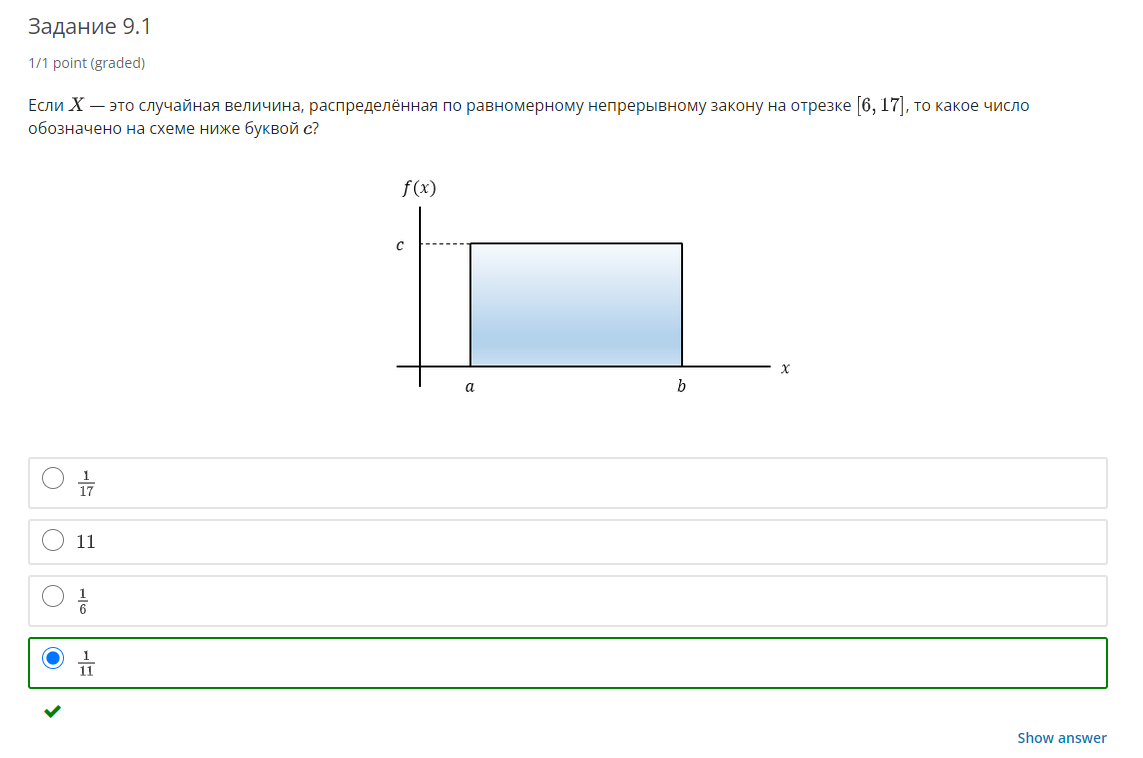

# **НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ**

## **Нормальное распределение** (его ещё называют **гауссовским** или **распределением Гаусса**) представляет собой распределение вероятностей, обычно используемое для моделирования таких явлений, как физические характеристики (например, рост, вес и т. д.) или результаты тестирований.

Кроме того, что по нормальному закону распределены многие величины, нормальное распределение очень часто используется в статистике и машинном обучении, чтобы проверить корректность построенной в модели. К примеру, вы уже отлично умеете решать задачу регрессии и, конечно же, знаете, что такое остатки (или их ещё называют отклонениями или ошибками) — разница между реальными и предсказанными значениями. Оказывается, чтобы убедиться, что модель корректная, необходимо собрать все эти остатки и проверить, распределены ли они по нормальному закону. Это можно сделать и визуально — форма нормального распределения легко узнаваема и выглядит следующим образом:

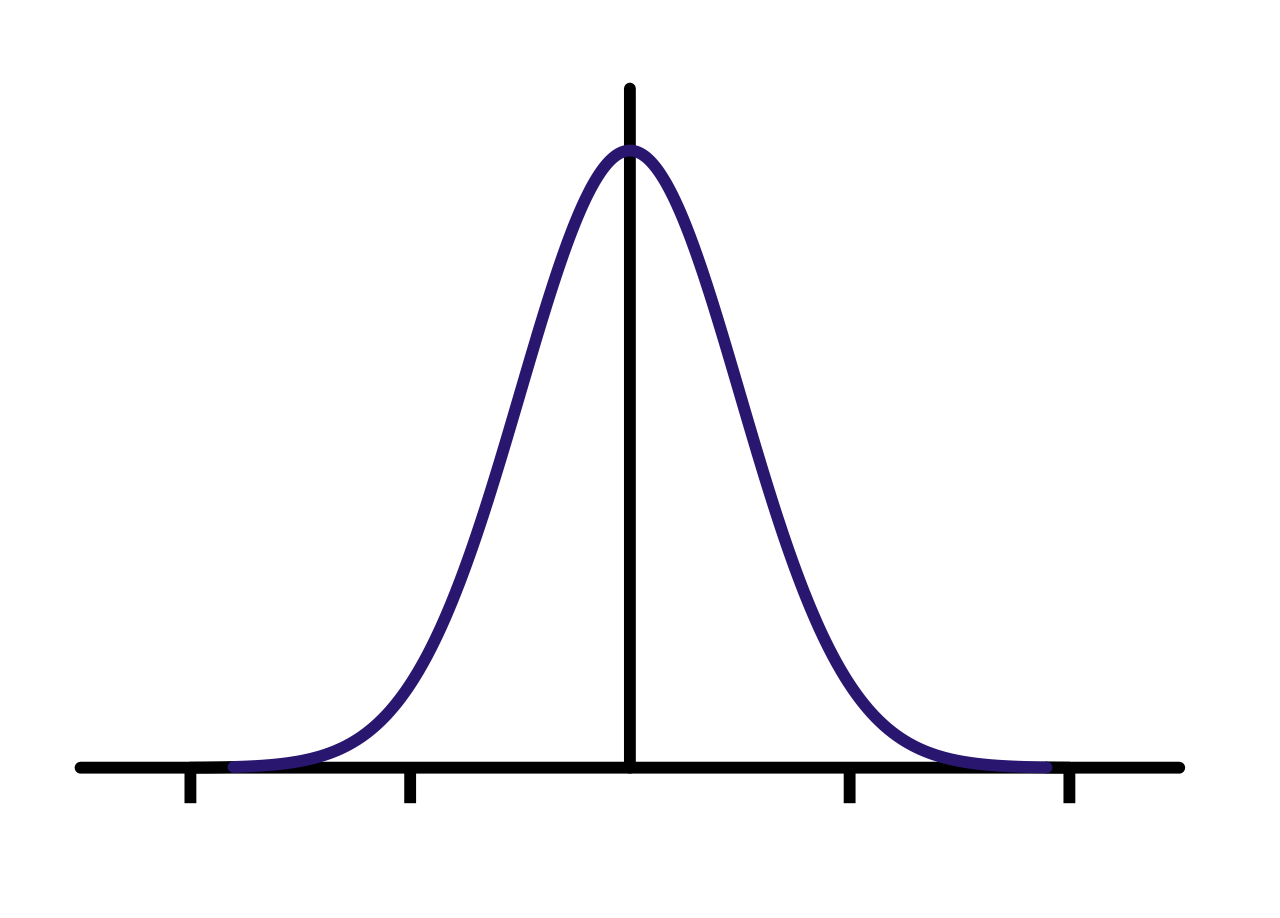

Видно, что у данного распределения очень большая плотность около середины и намного меньше — у краёв. Если бы мы построили график для остатков в модели линейной регрессии и получили такой результат, мы могли бы сделать вывод, что с точки зрения этого критерия модель построена корректно. В целом, с физическими характеристиками в жизни всё работает ровно так же: например, много людей среднего роста, мало очень высоких или очень низких.

Обычно гауссовское распределение определяется через математическое ожидание и стандартное отклонение — это записывается следующим образом:

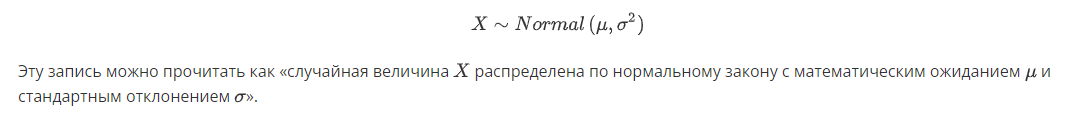

Плотность нормального распределения задаётся формулой:

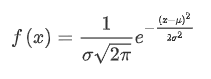

---

В математике считается, что если мы возьмём много разных случайных величин, которые являются независимыми (или слабо зависимыми друг от друга), то они образуют нормальное распределение. Это утверждение называется **центральной предельной теоремой (ЦПТ)**.

Центральная предельная теорема является буквально сердцем статистики, а также всей концепции проверки статистических гипотез. Именно благодаря ей мы имеем возможность реализовывать различные статистические критерии, например проводить A/B-тесты, с помощью которых можно оценить, правда ли один рекламный ролик эффективнее, чем другой, или выявить, какой интерфейс интернет-магазина больше стимулирует людей к покупкам.

### Во многом именно благодаря этой теореме нормальные распределения являются подходящей аппроксимацией, даже если известно, что основное распределение не является нормальным.

Это удобно, так как с помощью нормального распределения легко получить вероятностные оценки.

Существует **эмпирическое правило трёх сигм**, которое гласит:

+ Если отступить от среднего на одно стандартное отклонение в меньшую и большую сторону, то в этих пределах будет 68 % данных.
+ Если отступить от среднего на два стандартных отклонения в меньшую и большую сторону, то в этих пределах будет 95 % данных.
+ Если отступить от среднего на три стандартных отклонения в меньшую и большую сторону, то в этих пределах будет 99.7% данных.

Эта идея также проиллюстрирована ниже:

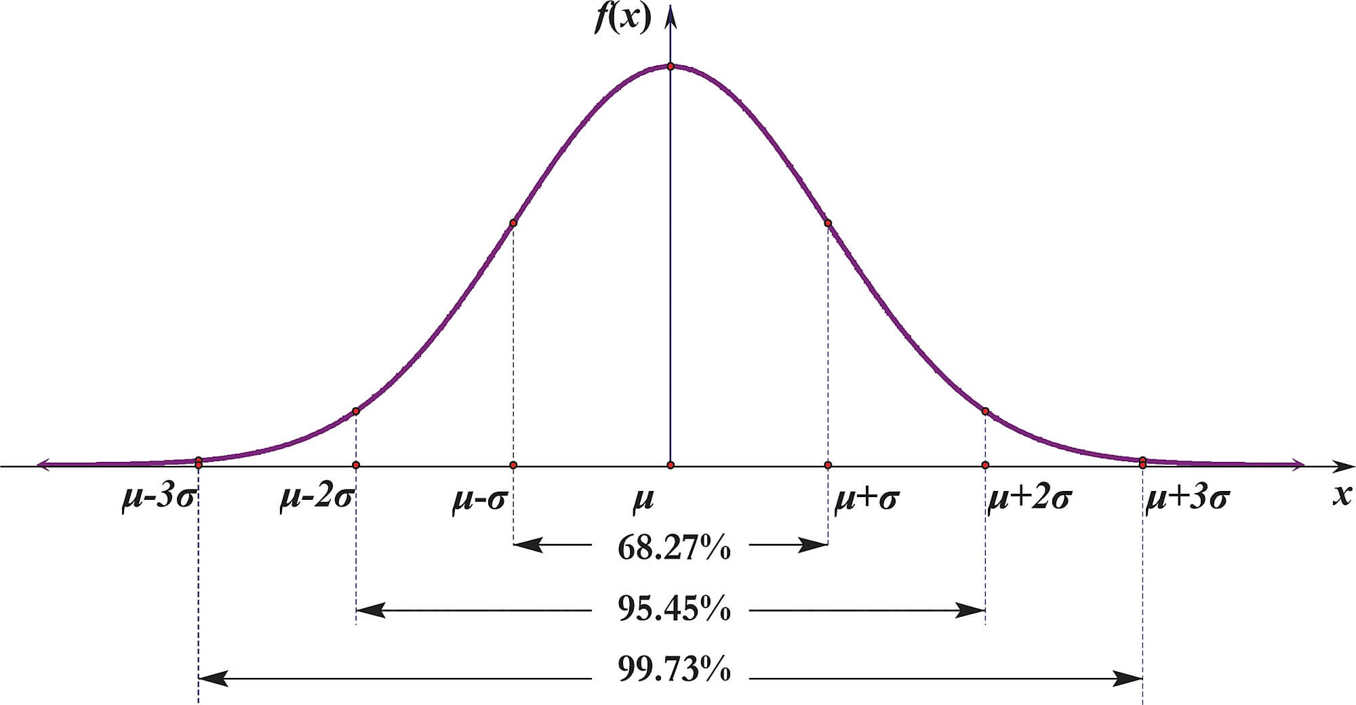

### Это знание даёт нам много полезной информации. К примеру, мы знаем, что по результатам работы сотрудников колл-центра среднее количество продаж составило 100, а стандартное отклонение — 10. Исходя из этих данных, мы моментально можем вычислить, что это значит, что 68 % персонала смогли сделать от 90 до 110 продаж, 95 % — от 80 до 120, а 99.7 % — от 70 до 130. Здесь мы понимаем, что если кто-то смог реализовать не более 70 продаж, то он явно справляется с обязанностями гораздо хуже, чем его коллеги. Если есть те, у кого более 130 продаж, — это самые ценные сотрудники, и их стоит поощрить бонусами.

Кроме того, нормальное распределение обладает рядом сильно упрощающих жизнь характеристик, многие из которых можно наблюдать на приведённом выше графике: он симметричный и «одновершинный», что означает, что его среднее значение, медиана и мода равны, то есть можно сделать вычисления для одной меры и получить сразу три.

Также очень важно иметь представление о нормальном распределении, так как многие статистические критерии (например, те, которые используются для A/B-тестов) могут быть реализованы только для нормально распределённых данных.

Давайте смоделируем нормальное распределение с математическим ожиданием, равным 5, и стандартным отклонением, равным 4, и посмотрим, какой вид оно примет.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


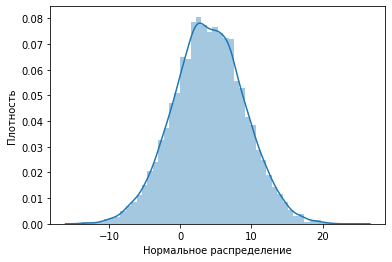

In [13]:
data = norm.rvs(size=10000,loc=4,scale=5)
 
ax = sns.distplot(data,
                  bins=50)
ax.set(xlabel='Нормальное распределение', ylabel='Плотность');

Мы видим, что распределение не выстраивается в идеально гладкий «колокол», но очень близко к этой форме.

## → Когда вы в будущем будете реализовывать статистические тесты, для которых необходимо соответствие нормальному распределению, вы сможете подобным образом оценивать форму распределения для ваших данных.

Среди всех нормальных распределений выделяют одно особенное — **стандартное нормальное**. У него нулевое среднее и единичная дисперсия.

График его плотности изображён ниже:

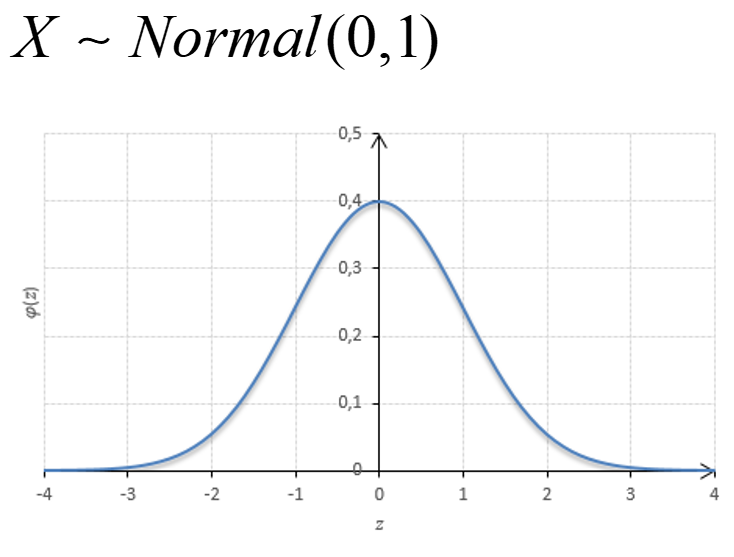

Это своего рода эталон нормальных распределений.

Для нас представляет интерес переход от произвольного нормального распределения к стандартному.

Если у нас есть нормальное распределение, то, чтобы свести его стандартному, необходимо из каждого значения вычесть среднее и разделить на стандартное отклонение:

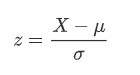



### Чем это может быть полезно? Допустим, нам нужно сравнить результаты тестирования двух групп студентов, которые сдавали разные экзамены на знание английского языка, TOEFL и IELTS. Первый экзамен оценивается по шкале от 0 до 120, а второй — от 0 до 9. Как сравнить результаты, измеренные в разных единицах, между собой? Здесь нам и помогает стандартизированное распределение. Если мы переведём оценки обеих групп студентов в так называемые $z$-оценки, то сможем сравнить результаты между группами. 

Такая стандартизация используется также в машинном обучении, чтобы привести признаки к одной шкале измерения — это сильно повышает качество моделей. Вы уже сталкивались с подобной процедурой, когда делали шкалирование признаков.

С помощью Python мы можем стандартизировать данные следующим образом:

In [14]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
data = asarray([[93, 44],
                [4, 2],
                [36, 1],
                [14, 29],
                [78, 21]])
print(data)
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
print(scaled)

[[93 44]
 [ 4  2]
 [36  1]
 [14 29]
 [78 21]]
[[ 1.37243726  1.50201177]
 [-1.17229016 -1.06239857]
 [-0.25733199 -1.12345596]
 [-0.88636573  0.58615094]
 [ 0.94355062  0.09769182]]


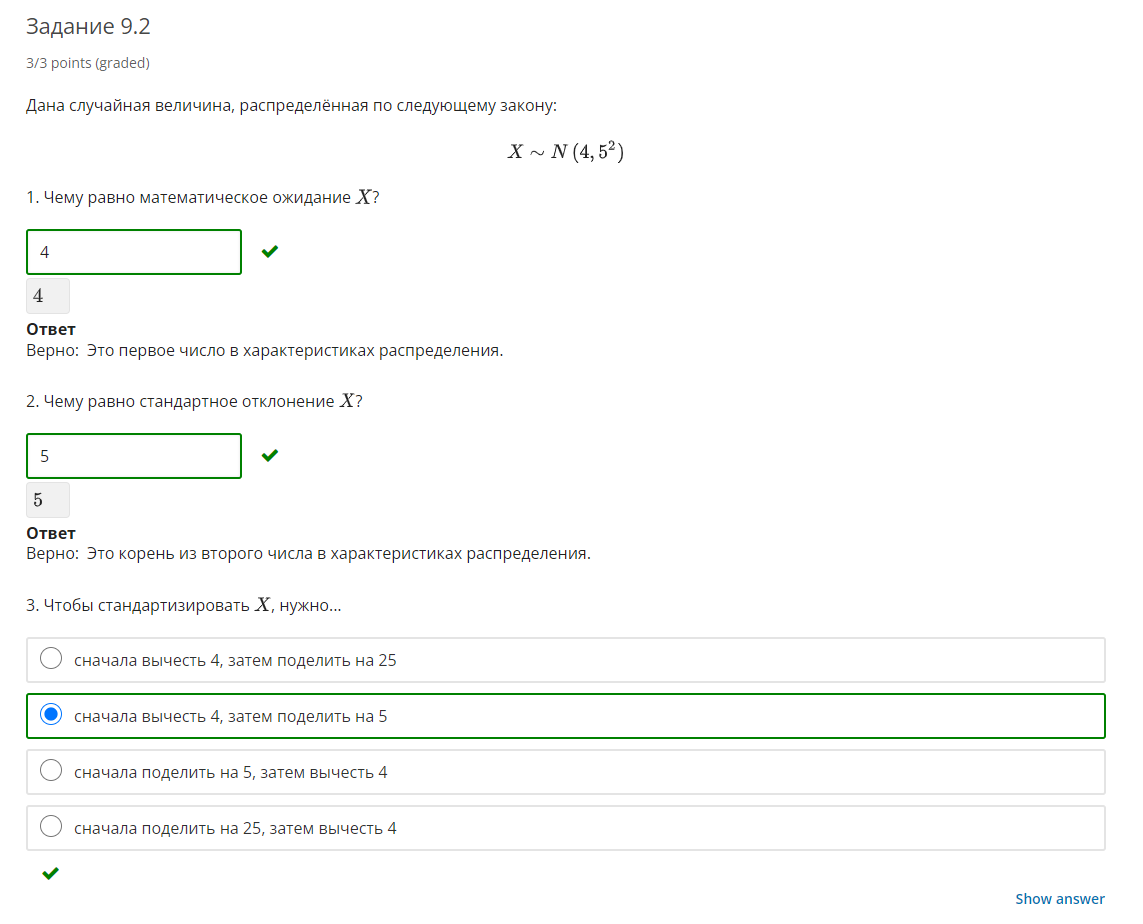

# **ЭКСПОНЕНЦИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ**

## **Экспоненциальное распределение** — это распределение вероятностей времени между событиями в процессе Пуассона.

Как вы помните, в процессе Пуассона нам известно, сколько событий происходит за какой-то промежуток времени.

В реальной жизни интервалы времени между событиями обычно разные. Например, если мы анализируем количество поступающих на рабочую почту писем, то оно может быть разным в зависимости от дня и времени суток. Но если мы возьмём небольшой временной интервал, в течение которого скорость примерно постоянная, например с 10:30 до 14:30 в понедельник, экспоненциальное распределение можно использовать как хорошую приблизительную модель для времени до поступления следующего письма.

## Значениями случайной величины, распределённой по экспоненциальному закону, являются любые вещественные неотрицательные числа.

Плотность экспоненциального распределения задаётся следующей формулой:

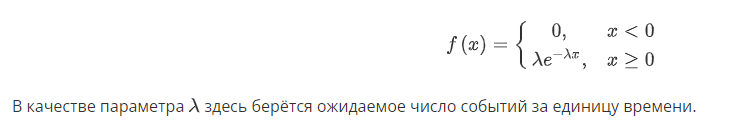

С помощью Python мы можем смоделировать экспоненциальное распределение так:

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


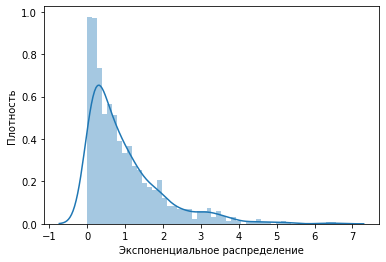

In [15]:
data = expon.rvs(scale=1,loc=0,size=1000)
ax = sns.distplot(data,
                  bins=50)
ax.set(xlabel='Экспоненциальное распределение', ylabel='Плотность');

Математическое ожидание для этого распределения вычисляется по следующей формуле:

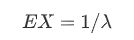

Стандартное отклонение можно найти ровно так же:

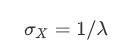

Вероятность того, что значение случайной величины будет не больше $x$, равна:

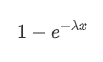

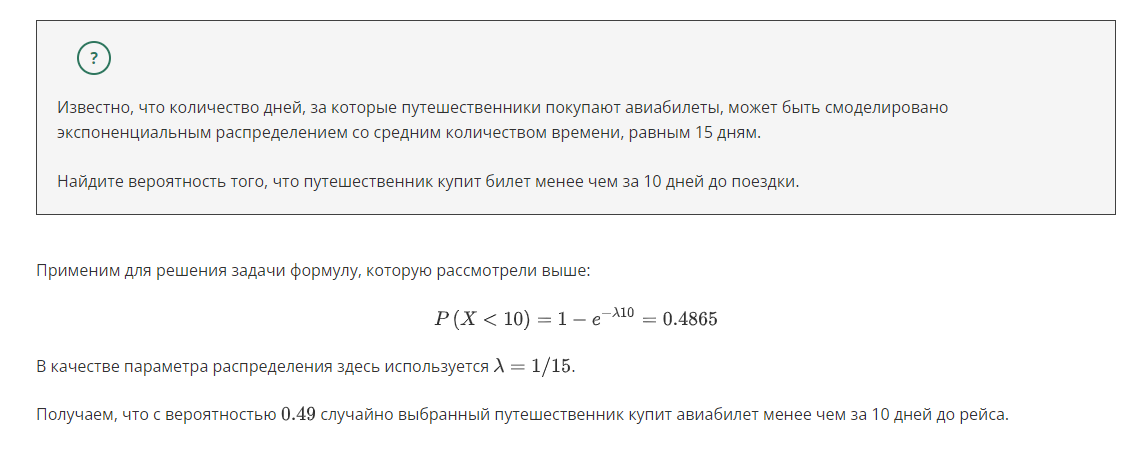

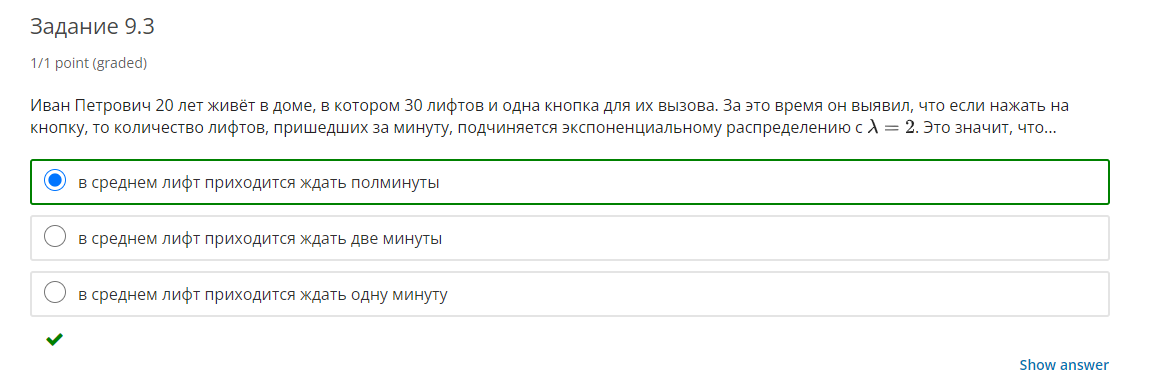

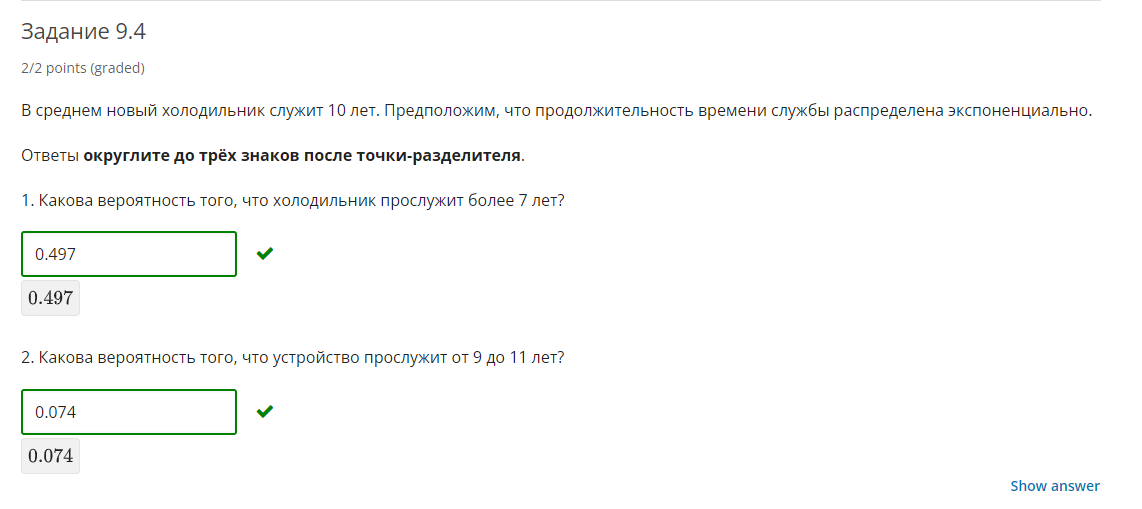

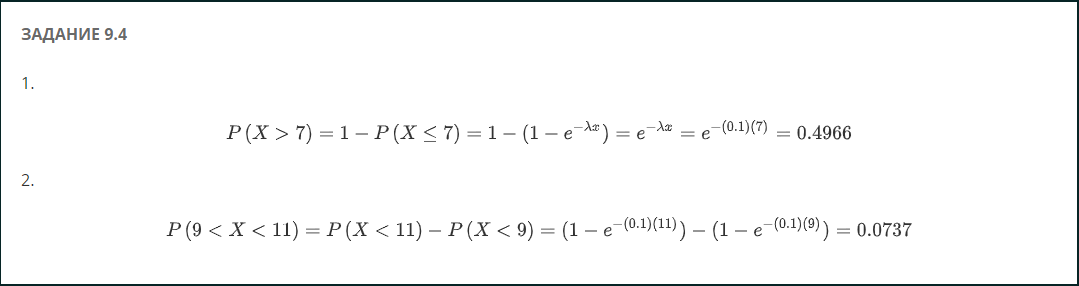

## Задание 9.5

Для моделирования роста всех жителей России лучше всего подойдёт...

+ нормальная модель